<a href="https://colab.research.google.com/github/deniseiras/Classification-Default-of-Credit-Card-Clients/blob/main/Default_of_Credit_Card_Clients.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Classification - inadimplência de cartão de crédito

Autor: Denis M. A. Eiras

contato: denis.eiras@gmail.com

Atualizado em: 09/09/2023 12h:00

**Classification**

Nos mercados de crédito, um problema típico é saber se, dadas as informações de uma pessoa, ela pagará ou não sua dívida. A partir da base disponível em https://www.kaggle.com/datasets/uciml/default-of-credit-cardclients-dataset?resource=download gere um modelo preditivo de
classificação (variável target: ‘default.payment.next.month’), separe 30% da base para teste e traga métricas para validar o modelo em questão.




# Introdução

Com o rápido desenvolvimento da indústria de cartões de crédito, há um número crescente de taxas de inadimplência nos empréstimos, o que impõe um risco financeiro para os bancos comerciais. Portanto, resoluções bem-sucedidas dos riscos são importantes para o desenvolvimento saudável da indústria no longo prazo. Os métodos existentes, como o modelo FICO podem estimar as probabilidades de inadimplência do cartão de crédito, mas são totalmente baseados no julgamento subjetivo das pessoas. Além disso, os dados de inadimplência de cartão de crédito são sempre desbalanceados, sendo a maioria adimplentes, o que traz desafios para a construção do modelo de inadimplência. Na atual era do big data, os métodos de Machine Learning (ML) são populares por sua alta eficiência e alta precisão [1].

Em uma pesquisa sobre artigos mais bem citados sobre os modelos de ML mais utilizados, encontra-se o uso de algumas técnicas. Em [1], utilizou-se regressão logística, árvores de decisão e ensemble learning como Adaboosting e Random Forest para concluir que Random Forest são os melhores, atingindo uma acurácia de 82,12%. Em [2],regressão logística, a árvore de decisão rpart e a Random Forest foram usadas, onde novamente se identificou uma maior acurácia (81,81%) e área sob a curva (AUC) de 77% ao usar Random Forest, corroborando o trabalho de[1] e [3], que usaram o mesmo data set deste trabalho.

Em [3], analisou-se os métodos de feature selection Correlation-based Feature Selection (CFS) e InfoGain, mostrando que dentre diversos algoritmos de ML apenas NayveBayes e BayesNet se beneficiaram destes, e RandomForest obteve melhores resultados com o dataset completo. Outros trabalhos se beneficiaram utilizando técnicas de feature selection com Regressão Logística [1]  e (CFS) [2].

Outras técnicas como a Análise de Componentes Principais (Principal Component Analysis - PCA) não foram identificadas nos trabalhos. PCA é uma técnica de redução de dimensionalidade amplamente utilizada em análise de dados e aprendizado de máquina para simplificar conjuntos de dados complexos, reduzindo o número de variáveis (ou dimensões) enquanto mantém o máximo de informações possível.



# Metodologia

No Kaggle, existem diversas discussões sobre o DataSet, algumas delas respondidas pelo autor dos dados, como a escala para o status de "repayment", ou reembolso, com o valor = -2, que significa "nenhum consumo", que não estão explicadas no Dataset. Alguns autores de notebook simplemente alteram esse valor para zero (uso do crédito rotativo).

Outras dúvidas surgem como, como foi definido o comportamento inadimplente a ser predito ? Foi uma predição ou é um dado real? Essa questão surge após a análise de contas com nenhum valor em todos os meses e "repayment" = -2. A resposta do autor é simplesmente Y: client's behavior; Y=0 then not default, Y=1 then default".

Analisando estas discussões e verificando que feature selection não resultaram na melhor performance ao usar RandonForest em alguns trabalhos [3], este trabalho não fará uma análise do dataset e usará o algoritmo RandomForest. Outros motivos para isto são que o RandomForest é uma ótima escolha para se ajustar a outliers, e a substituir pré processamento de features, como no caso de variáveis ​​como Educação, Casamento e Salário, as quais mesclaram valores não conhecidos para "Outros" para dar mais sentido aos dados [2]. Ainda, será utilizada a técnica Principal Component Analysis (PCA) para reduzir a dimensionalidade dos dados pela metade, na tentativa de se identifcar as colunas mais efetivas

A metodologia consiste em:
1. Análise do dataset
2. Pré-processamento com PCA
3. Divisão em base de testes e treinamento
4. Construção dos modelos e uso de diferentes hiperparâmetros para avaliação sobre a base de testes
5. Avaliação e escolha dos melhores hiperparâmetros sobre a base de testes

Os passos da metodologia são detalhados em cada sub seção.





Inicialização de bibliotecas


In [7]:
# devtools::install_github("imbs-hl/ranger")

pacotes <- c('tidyverse',  # Pacote básico de datawrangling
             'viridis',
             'rpart',      # Biblioteca de árvores
             'rpart.plot', # Conjunto com Rpart, plota a parvore
             'gtools',     # funções auxiliares como quantcut,
             'scales',     # importa paletas de cores
             'caret',      # Funções úteis para machine learning
             'e1071',      # Para PCA
             'readr'       # ler dataset from url
#              'ranger',     # a c++ implementation of random forest
#              'h2o'         # a java-based implementation of random forest
             )

if(sum(as.numeric(!pacotes %in% installed.packages())) != 0){
  instalador <- pacotes[!pacotes %in% installed.packages()]
  for(i in 1:length(instalador)) {
     install.packages(instalador, dependencies = T)
    break()}
  sapply(pacotes, require, character = T)
} else {
  sapply(pacotes, require, character = T)
}

Installing packages into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘assertthat’, ‘checkmate’, ‘listenv’, ‘parallelly’, ‘ratelimitr’, ‘htmlTable’, ‘future’, ‘globals’, ‘R.methodsS3’, ‘R.oo’, ‘R.utils’, ‘later’, ‘triebeard’, ‘XML’, ‘WikipediR’, ‘WikidataQueryServiceR’, ‘Hmisc’, ‘pbapply’, ‘shape’, ‘future.apply’, ‘progressr’, ‘SQUAREM’, ‘httpuv’, ‘sourcetools’, ‘R.cache’, ‘TH.data’, ‘lazyeval’, ‘plotrix’, ‘numDeriv’, ‘MatrixModels’, ‘minqa’, ‘nloptr’, ‘RcppEigen’, ‘bitops’, ‘htmlwidgets’, ‘crosstalk’, ‘promises’, ‘plogr’, ‘mnormt’, ‘urltools’, ‘httpcode’, ‘rentrez’, ‘rncl’, ‘solrium’, ‘WikidataR’, ‘fastmatch’, ‘igraph’, ‘quadprog’, ‘profileModel’, ‘diagram’, ‘lava’, ‘shiny’, ‘miniUI’, ‘styler’, ‘classInt’, ‘labelled’, ‘libcoin’, ‘multcomp’, ‘rex’, ‘Rcpp’, ‘Formula’, ‘plotmo’, ‘TeachingDemos’, ‘carData’, ‘abind’, ‘pbkrtest’, ‘quantreg’, ‘lme4’, ‘caTools’, ‘Cairo’, ‘doParallel’, ‘doRNG’, ‘equate’, ‘gridBase’, ‘iterators’, ‘matrixStats’, ‘pl

tidyverse    viridis      rpart rpart.plot     gtools     scales      caret 
      TRUE       TRUE       TRUE       TRUE       TRUE       TRUE       TRUE 
     e1071      readr 
      TRUE       TRUE

## 1) Análise do dataset



Carregamento do dataset
As série foi copiada para uma pasta púbilica do Dropbox, para facilitar

In [8]:
# Load required libraries
library(readr)

# Specify the URL for the dataset (direct link to the CSV file)
dataset_url <- "https://www.dropbox.com/scl/fi/6sr6i10t7oie7s1qwm9g9/UCI_Credit_Card.csv?rlkey=hy84q79rr47ndk8gsmtmiyrqd&dl=1"
file_path = "/content/UCI_Credit_Card.csv"
download.file(dataset_url, file_path)

credit_card_data <- read.csv(file_path)

Análise do data set

In [9]:
head(credit_card_data)
summary(credit_card_data)

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,⋯,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
,<int>,<dbl>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
1,1,20000,2,2,1,24,2,2,-1,-1,⋯,0,0,0,0,689,0,0,0,0,1
2,2,120000,2,2,2,26,-1,2,0,0,⋯,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,3,90000,2,2,2,34,0,0,0,0,⋯,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,4,50000,2,2,1,37,0,0,0,0,⋯,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
5,5,50000,1,2,1,57,-1,0,-1,0,⋯,20940,19146,19131,2000,36681,10000,9000,689,679,0
6,6,50000,1,1,2,37,0,0,0,0,⋯,19394,19619,20024,2500,1815,657,1000,1000,800,0


       ID          LIMIT_BAL            SEX          EDUCATION    
 Min.   :    1   Min.   :  10000   Min.   :1.000   Min.   :0.000  
 1st Qu.: 7501   1st Qu.:  50000   1st Qu.:1.000   1st Qu.:1.000  
 Median :15000   Median : 140000   Median :2.000   Median :2.000  
 Mean   :15000   Mean   : 167484   Mean   :1.604   Mean   :1.853  
 3rd Qu.:22500   3rd Qu.: 240000   3rd Qu.:2.000   3rd Qu.:2.000  
 Max.   :30000   Max.   :1000000   Max.   :2.000   Max.   :6.000  
    MARRIAGE          AGE            PAY_0             PAY_2        
 Min.   :0.000   Min.   :21.00   Min.   :-2.0000   Min.   :-2.0000  
 1st Qu.:1.000   1st Qu.:28.00   1st Qu.:-1.0000   1st Qu.:-1.0000  
 Median :2.000   Median :34.00   Median : 0.0000   Median : 0.0000  
 Mean   :1.552   Mean   :35.49   Mean   :-0.0167   Mean   :-0.1338  
 3rd Qu.:2.000   3rd Qu.:41.00   3rd Qu.: 0.0000   3rd Qu.: 0.0000  
 Max.   :3.000   Max.   :79.00   Max.   : 8.0000   Max.   : 8.0000  
     PAY_3             PAY_4             PAY_5  

## 2) Pré Processamento com PCA


In [10]:
# Number of components to retain PCA
train_cols_size <- ncol(credit_card_data)-2  # remove columns ID (0) and default (last)
train_cols_interval = 1:train_cols_size+1
data_train_columns = credit_card_data[, train_cols_interval]

colnames(data_train_columns)
ncol(data_train_columns) # checkin train cols
dim(data_train_columns)

pca_num_components <- train_cols_size / 2
pca_result <- prcomp(data_train_columns, scale. = TRUE)
data_pca_train <- predict(pca_result, newdata = data_train_columns)[, 1:pca_num_components]
train_col_names = colnames(data_pca_train)
train_col_names
data_pca <- cbind(data_pca_train, defvar = credit_card_data$default.payment.next.month)
data_pca <- as.data.frame(data_pca)
data_pca$defvar <- factor(data_pca$defvar, levels = c(0, 1), labels = c("No", "Yes"))
dim(data_pca)
head(data_pca)


[1] "LIMIT_BAL" "SEX"       "EDUCATION" "MARRIAGE"  "AGE"       "PAY_0"    
 [7] "PAY_2"     "PAY_3"     "PAY_4"     "PAY_5"     "PAY_6"     "BILL_AMT1"
[13] "BILL_AMT2" "BILL_AMT3" "BILL_AMT4" "BILL_AMT5" "BILL_AMT6" "PAY_AMT1" 
[19] "PAY_AMT2"  "PAY_AMT3"  "PAY_AMT4"  "PAY_AMT5"  "PAY_AMT6"

[1] 23

[1] 30000    23

[1] "PC1"  "PC2"  "PC3"  "PC4"  "PC5"  "PC6"  "PC7"  "PC8"  "PC9"  "PC10"
[11] "PC11"

[1] 30000    12

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,defvar
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
1,-1.8879310,0.90609354,-0.4877867,0.5400061,0.9979407,0.04440316,-0.62367631,-0.11279197,0.1898909,0.08460100,0.24535970,Yes
2,-0.7646830,2.10925241,1.0972952,0.4834717,0.8589659,-0.23509456,0.06474085,-0.09359350,0.1536970,-0.12403256,0.14170885,Yes
3,-0.8473938,1.07216109,0.4121714,0.4335567,0.7704799,0.01866472,-0.15046991,0.09188216,0.1561766,-0.08916925,0.04622141,No
4,-0.1965853,0.80900807,-0.8186287,-0.2928734,0.9093509,-0.28464020,0.23521694,0.06298319,-0.1146105,0.06700614,0.02131733,No
5,-0.8409201,0.07253681,-1.0052407,-2.3279745,-1.0231067,0.79431701,0.71105723,-0.12418877,-0.6025176,0.30747309,1.03583122,No
6,-0.1837364,0.83994548,0.3578153,0.7481763,-1.4676916,0.36023019,0.27586185,0.13884023,-0.1533063,0.18480512,-0.02458419,No


## 3) Divisão da base em base de testes e treinamento

A divisão entre a base de treinamento e testes é balanceada com relação à coluna prevista 'default', com proporção 70%/30%.

In [11]:
get_train_test_sets <- function (data) {
  train_proportion <- 0.7

  # Split the data into training and testing sets while balancing classes
  positive_samples <- data[data$defvar == "No", ]
  negative_samples <- data[data$defvar == "Yes", ]
  num_positive_samples_train <- ceiling(nrow(positive_samples) * train_proportion)
  num_negative_samples_train <- ceiling(nrow(negative_samples) * train_proportion)
  # Sample the required number of samples for each class
  train_positive_samples <- positive_samples[1:num_positive_samples_train, ]
  train_negative_samples <- negative_samples[1:num_negative_samples_train, ]
  # Combine the samples to create the training set
  train_data <- rbind(train_positive_samples, train_negative_samples)
  # Create the testing set by excluding the samples used for training
  test_data <- data[!rownames(data) %in% rownames(train_data), ]

  # Check class balance in the training and testing sets
  cat("Train data set\n No / Yes \n")
  cat(table(train_data$defvar))
  cat("\nTest data set\n No / Yes \n")
  cat(table(test_data$defvar))
  cat("\n")

  result <- list(train_data=train_data, test_data=test_data)
  return(result)

}

## 4) Construção dos modelos
Executou-se 3 vezes:
- Divisão da base em treino e testes (70%/30%)
- Para cada configuração de tamanho de árvore, executa-se o treinamento:
  - k-folds=5 repetindo 3 vezes
  - variação da seleção de variáveis de 1 até o máximo de variáveis PCA
  - avaliação do resultado na base de testes.

Em seguida, armazena-se a configuração e métricas do melhor resultado, em termos da métrica escolhida:  Area Under Curve (AUC).

Para avaliação, foi usada a métrica AUC. A métrica Receiver Operating Characteristic (ROC) é uma representação gráfica e uma métrica de avaliação popular para modelos de classificação binária. É usado para avaliar o desempenho de um classificador, principalmente em cenários onde a distribuição de classes é desequilibrada. A análise da curva ROC, AUC, concentra-se no equilíbrio entre a taxa de verdadeiros positivos (TPR) e a taxa de falsos positivos (FPR) em diferentes limites de classificação.

O melhor resultado, em termos de AUC, dentre todas as configurações, é selecionado para avaliação.


In [12]:
# helper function for the plots
tune_plot <- function(x, probs = .80, metric) {
  ggplot(x) +
    coord_cartesian(ylim = c(max(x$results[,metric]), min(x$results[,metric]))) +
    theme_bw()
#     coord_cartesian(ylim = c(quantile(x$results$Accuracy, probs = probs), min(x$results$Accuracy))) +
#     theme_bw()
}

### Treinamento e Hiperparâmetrização





=====> Training execution started: 1 
Train data set
 No / Yes 
16355 4646
Test data set
 No / Yes 
7009 1990

Ntree =  10
Train time =  1.57240540186564
Train Base best models
   mtry  logLoss       AUC     prAUC  Accuracy     Kappa        F1
8     8 1.254952 0.6997521 0.5337217 0.7842008 0.2608595 0.8693586
6     6 1.234511 0.6996888 0.5395168 0.7855023 0.2617442 0.8703375
9     9 1.287926 0.6984008 0.5318276 0.7834546 0.2584583 0.8688934
10   10 1.282922 0.6975102 0.5317181 0.7822485 0.2557799 0.8680865
11   11 1.287855 0.6967766 0.5313547 0.7819786 0.2584844 0.8677139

Test Base results
      Predicted
Actual   No  Yes
   No  6498  511
   Yes 1428  562

True Positive (TP): 562 
True Negative (TN): 6498 
False Positive (FP): 511 
False Negative (FN): 1428 
Sensitivity (True Positive Rate): 0.2824121 
Specificity (True Negative Rate): 0.9270937 
Precision: 0.5237651 
F1 Score: 0.3669605 
Accuracy: 0.7845316 

Ntree =  50
Train time =  6.10838862260183
Train Base best models
   mtr

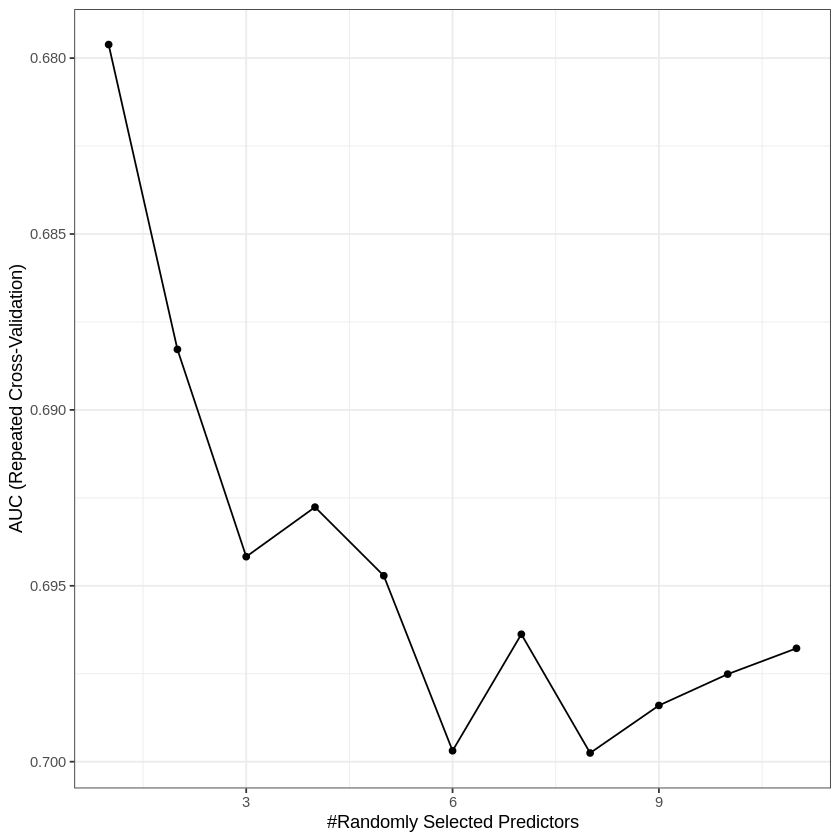


Train time =  11.9893050829569
Train Base best models
   mtry   logLoss       AUC     prAUC  Accuracy     Kappa        F1
9     9 0.4759968 0.7345725 0.6753158 0.7976445 0.2919198 0.8783130
8     8 0.4739916 0.7327606 0.6741533 0.7971049 0.2911128 0.8779302
10   10 0.4775624 0.7327001 0.6740972 0.7975333 0.2946348 0.8780794
6     6 0.4742515 0.7325101 0.6751673 0.7972952 0.2878531 0.8782505
11   11 0.4800770 0.7322522 0.6720446 0.7962795 0.2905073 0.8773118

Test Base results
      Predicted
Actual   No  Yes
   No  6654  355
   Yes 1387  603

True Positive (TP): 603 
True Negative (TN): 6654 
False Positive (FP): 355 
False Negative (FN): 1387 
Sensitivity (True Positive Rate): 0.3030151 
Specificity (True Negative Rate): 0.9493508 
Precision: 0.6294363 
F1 Score: 0.4090909 
Accuracy: 0.8064229 

Ntree =  150

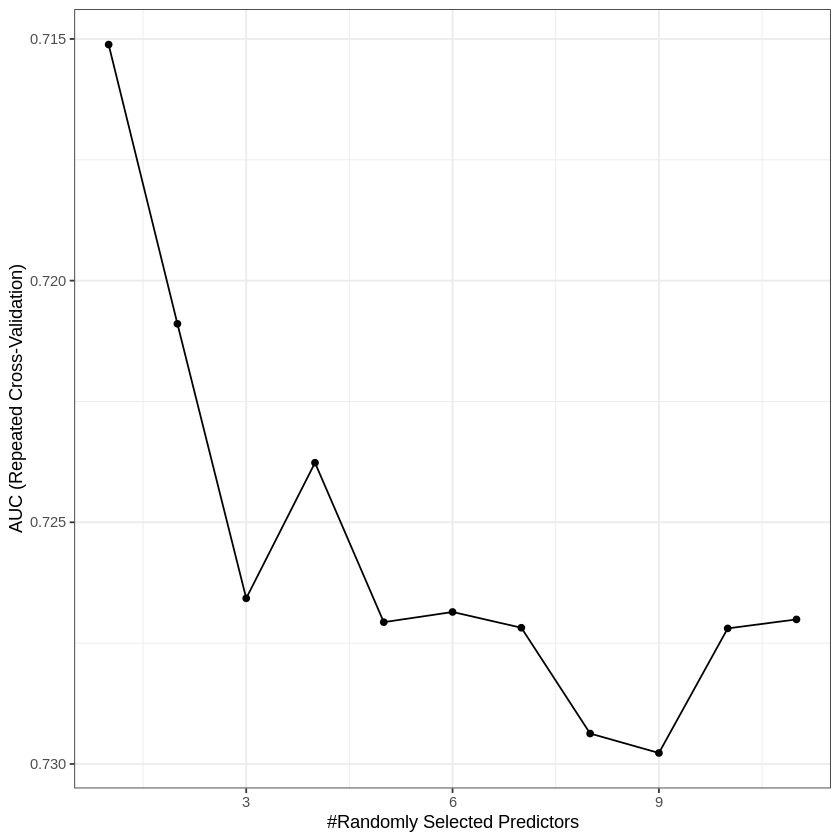


Train time =  17.5961916128794
Train Base best models
   mtry   logLoss       AUC     prAUC  Accuracy     Kappa        F1
9     9 0.4689194 0.7356416 0.6777816 0.7975651 0.2916558 0.8782655
8     8 0.4685817 0.7340796 0.6770902 0.7978984 0.2928054 0.8784655
10   10 0.4712279 0.7340525 0.6767457 0.7970254 0.2925092 0.8777934
6     6 0.4686962 0.7339090 0.6776384 0.7983904 0.2924410 0.8788708
7     7 0.4692227 0.7337353 0.6770895 0.7984222 0.2938832 0.8788200

Test Base results
      Predicted
Actual   No  Yes
   No  6659  350
   Yes 1393  597

True Positive (TP): 597 
True Negative (TN): 6659 
False Positive (FP): 350 
False Negative (FN): 1393 
Sensitivity (True Positive Rate): 0.3 
Specificity (True Negative Rate): 0.9500642 
Precision: 0.6304118 
F1 Score: 0.4065373 
Accuracy: 0.8063118 

Ntree =  200

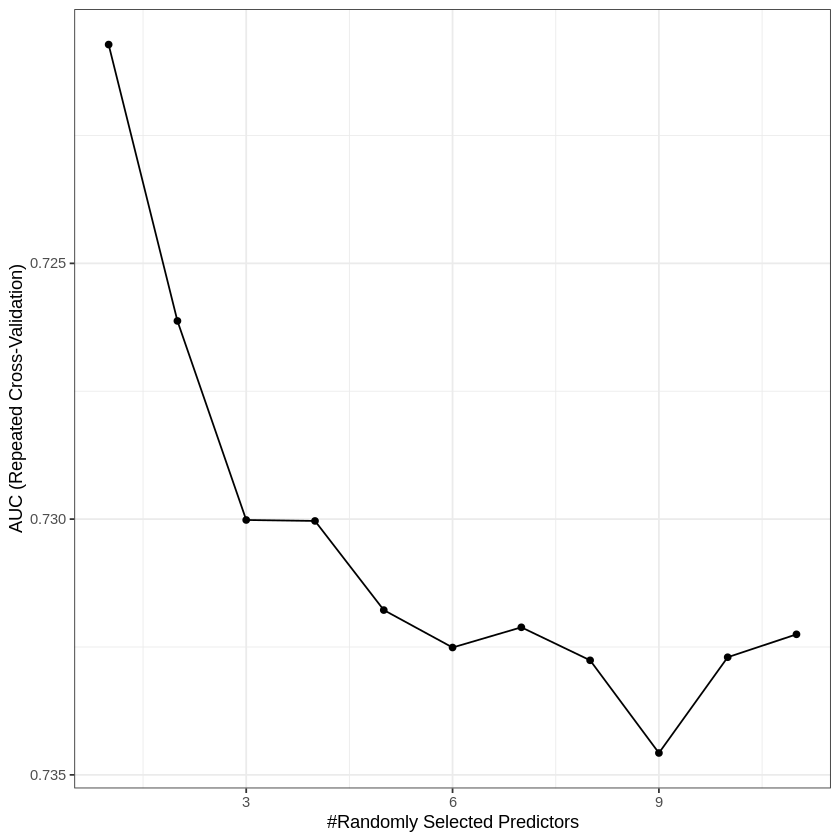


Train time =  23.4190223177274
Train Base best models
   mtry   logLoss       AUC     prAUC  Accuracy     Kappa        F1
9     9 0.4665761 0.7365078 0.6789700 0.7980254 0.2929694 0.8785570
8     8 0.4669759 0.7351323 0.6786414 0.7980730 0.2931897 0.8785820
7     7 0.4662698 0.7349947 0.6787257 0.7983587 0.2930661 0.8788129
6     6 0.4667657 0.7348067 0.6790560 0.7981999 0.2914023 0.8787759
10   10 0.4689920 0.7346572 0.6779136 0.7971365 0.2924753 0.8778827

Test Base results
      Predicted
Actual   No  Yes
   No  6660  349
   Yes 1394  596

True Positive (TP): 596 
True Negative (TN): 6660 
False Positive (FP): 349 
False Negative (FN): 1394 
Sensitivity (True Positive Rate): 0.2994975 
Specificity (True Negative Rate): 0.9502069 
Precision: 0.6306878 
F1 Score: 0.4061329 
Accuracy: 0.8063118 

Ntree =  250

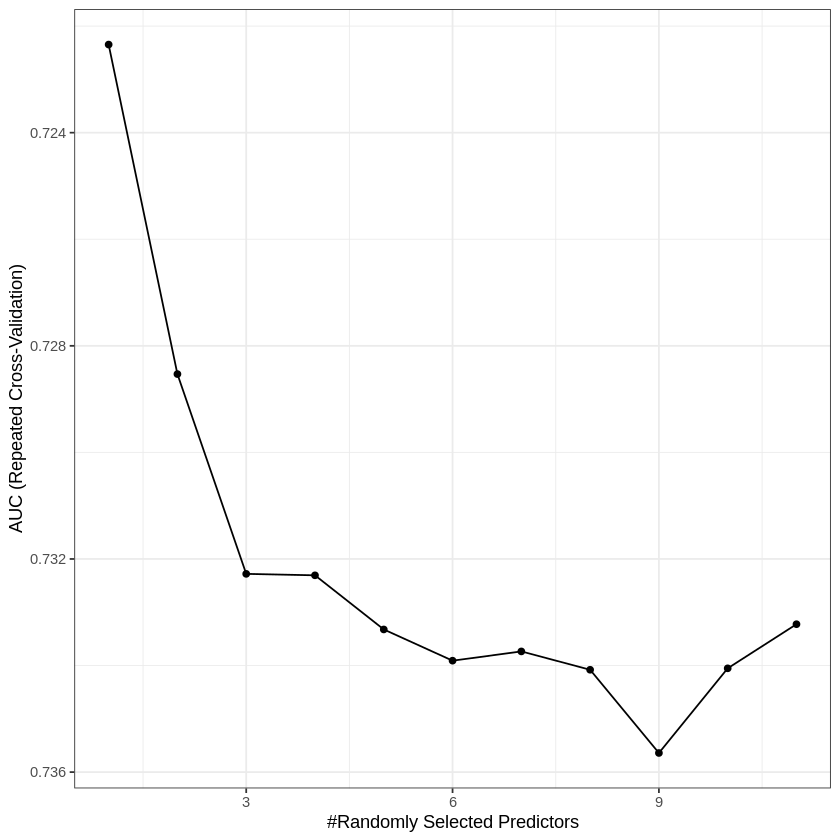


Train time =  28.8518579363823
Train Base best models
   mtry   logLoss       AUC     prAUC  Accuracy     Kappa        F1
9     9 0.4655400 0.7369741 0.6796374 0.7981682 0.2933524 0.8786480
8     8 0.4662393 0.7360410 0.6793002 0.7979619 0.2924937 0.8785309
7     7 0.4654807 0.7358761 0.6792672 0.7981999 0.2931426 0.8786844
11   11 0.4682310 0.7355340 0.6778991 0.7970731 0.2923624 0.8778379
5     5 0.4652187 0.7353549 0.6794040 0.7988665 0.2922755 0.8792523

Test Base results
      Predicted
Actual   No  Yes
   No  6662  347
   Yes 1392  598

True Positive (TP): 598 
True Negative (TN): 6662 
False Positive (FP): 347 
False Negative (FN): 1392 
Sensitivity (True Positive Rate): 0.3005025 
Specificity (True Negative Rate): 0.9504922 
Precision: 0.6328042 
F1 Score: 0.4074957 
Accuracy: 0.8067563 

Ntree =  300

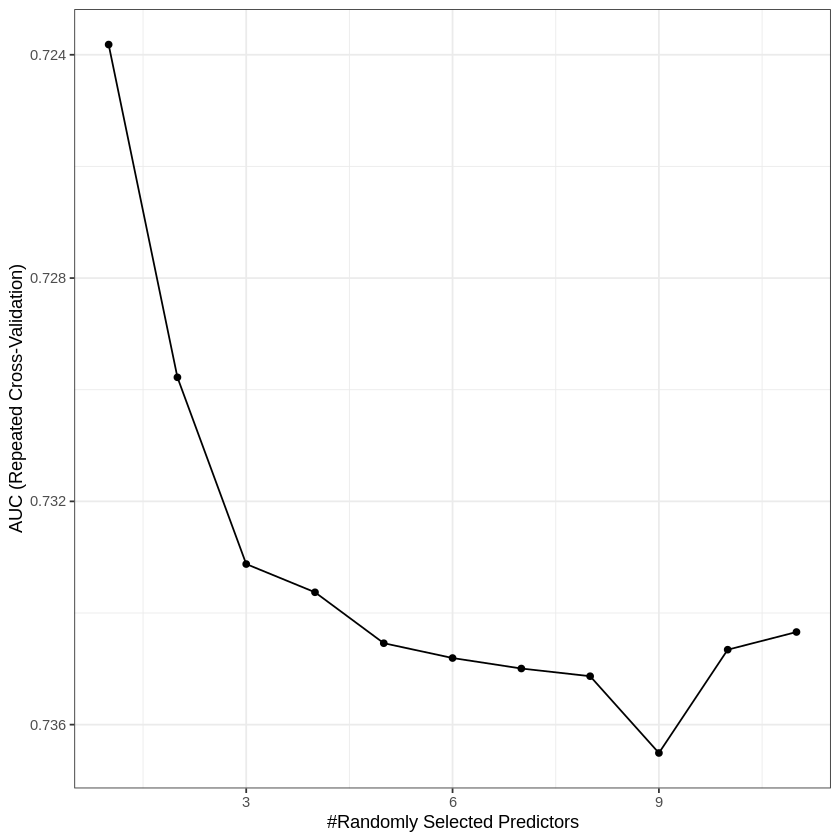


Train time =  34.5104445616404
Train Base best models
   mtry   logLoss       AUC     prAUC  Accuracy     Kappa        F1
9     9 0.4653807 0.7369500 0.6798834 0.7980571 0.2930549 0.8785761
8     8 0.4658746 0.7363025 0.6796591 0.7980095 0.2923421 0.8785767
7     7 0.4651160 0.7361095 0.6797235 0.7987396 0.2946490 0.8790300
11   11 0.4669475 0.7357196 0.6785372 0.7972318 0.2934677 0.8779052
6     6 0.4648924 0.7355585 0.6799204 0.7986603 0.2932811 0.8790390

Test Base results
      Predicted
Actual   No  Yes
   No  6663  346
   Yes 1391  599

True Positive (TP): 599 
True Negative (TN): 6663 
False Positive (FP): 346 
False Negative (FN): 1391 
Sensitivity (True Positive Rate): 0.301005 
Specificity (True Negative Rate): 0.9506349 
Precision: 0.6338624 
F1 Score: 0.4081772 
Accuracy: 0.8069786 



=====> Training execution started: 2 
Train data set
 No / Yes 
16355 4646
Test data set
 No / Yes 
7009 1990

Ntree =  10

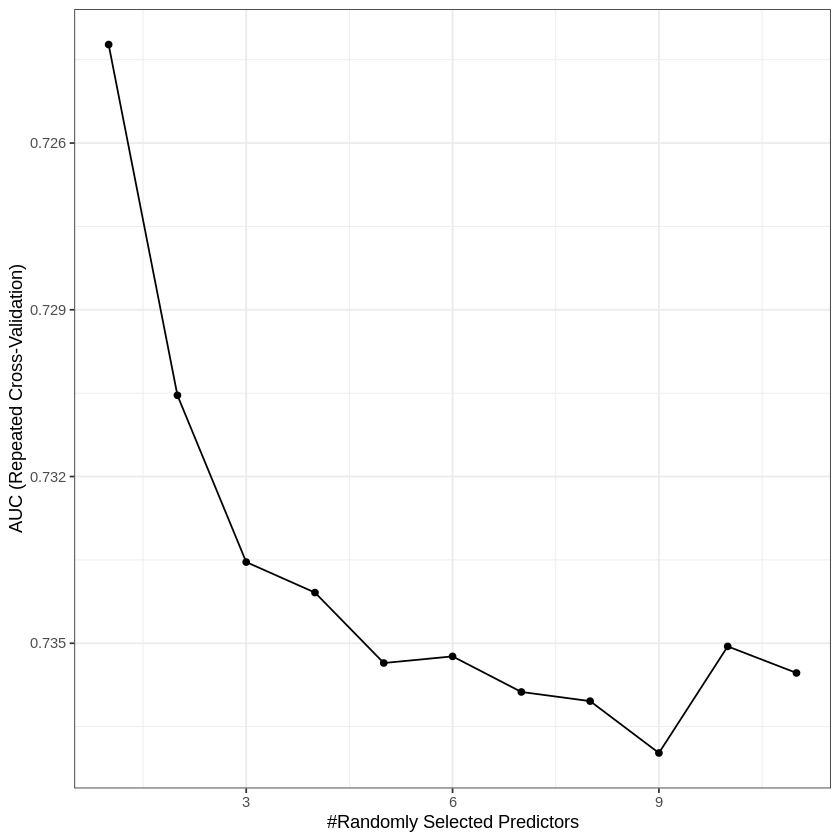


Train time =  1.57089196443558
Train Base best models
   mtry  logLoss       AUC     prAUC  Accuracy     Kappa        F1
10   10 1.221224 0.7002687 0.5340554 0.7829946 0.2579720 0.8685600
8     8 1.246558 0.7001121 0.5354117 0.7836293 0.2578067 0.8690739
9     9 1.251630 0.6995928 0.5342139 0.7837879 0.2603789 0.8690580
11   11 1.274713 0.6988442 0.5308310 0.7817883 0.2585962 0.8675595
7     7 1.261053 0.6981742 0.5359689 0.7840897 0.2568979 0.8694941

Test Base results
      Predicted
Actual   No  Yes
   No  6542  467
   Yes 1441  549

True Positive (TP): 549 
True Negative (TN): 6542 
False Positive (FP): 467 
False Negative (FN): 1441 
Sensitivity (True Positive Rate): 0.2758794 
Specificity (True Negative Rate): 0.9333714 
Precision: 0.5403543 
F1 Score: 0.3652695 
Accuracy: 0.7879764 

Ntree =  50

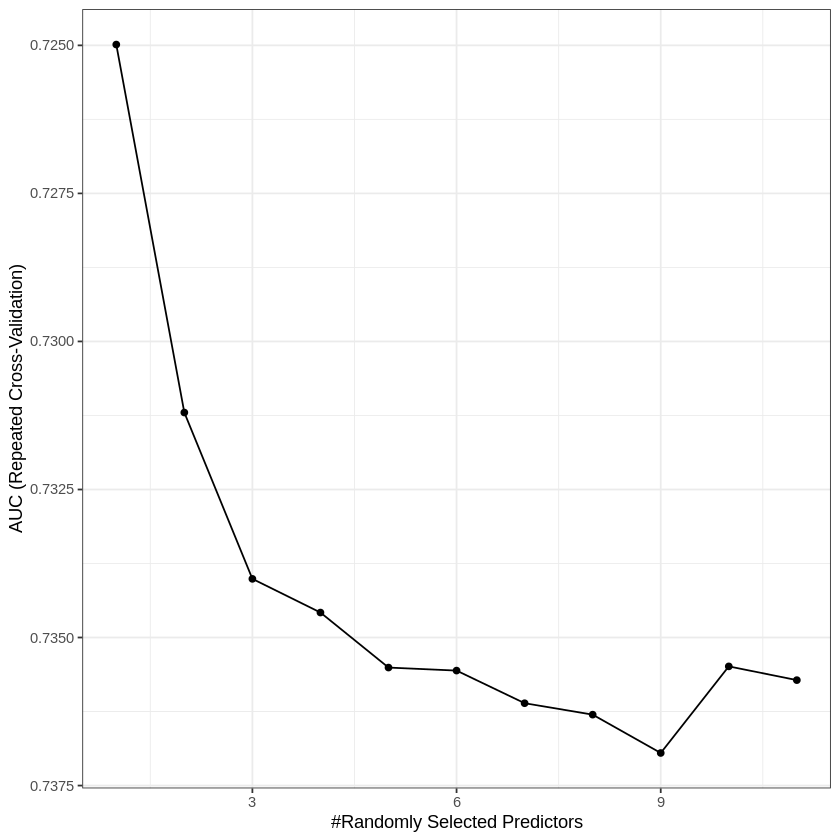


Train time =  5.95229074160258
Train Base best models
   mtry   logLoss       AUC     prAUC  Accuracy     Kappa        F1
9     9 0.5074292 0.7295430 0.6624242 0.7963907 0.2904685 0.8774041
10   10 0.5125439 0.7290502 0.6611835 0.7951367 0.2880058 0.8765492
8     8 0.5121842 0.7286853 0.6634956 0.7970891 0.2915108 0.8778999
11   11 0.5209258 0.7283781 0.6590585 0.7957559 0.2918491 0.8768289
5     5 0.5059173 0.7280892 0.6654084 0.7973589 0.2877256 0.8783122

Test Base results
      Predicted
Actual   No  Yes
   No  6639  370
   Yes 1415  575

True Positive (TP): 575 
True Negative (TN): 6639 
False Positive (FP): 370 
False Negative (FN): 1415 
Sensitivity (True Positive Rate): 0.2889447 
Specificity (True Negative Rate): 0.9472107 
Precision: 0.6084656 
F1 Score: 0.3918228 
Accuracy: 0.8016446 

Ntree =  100

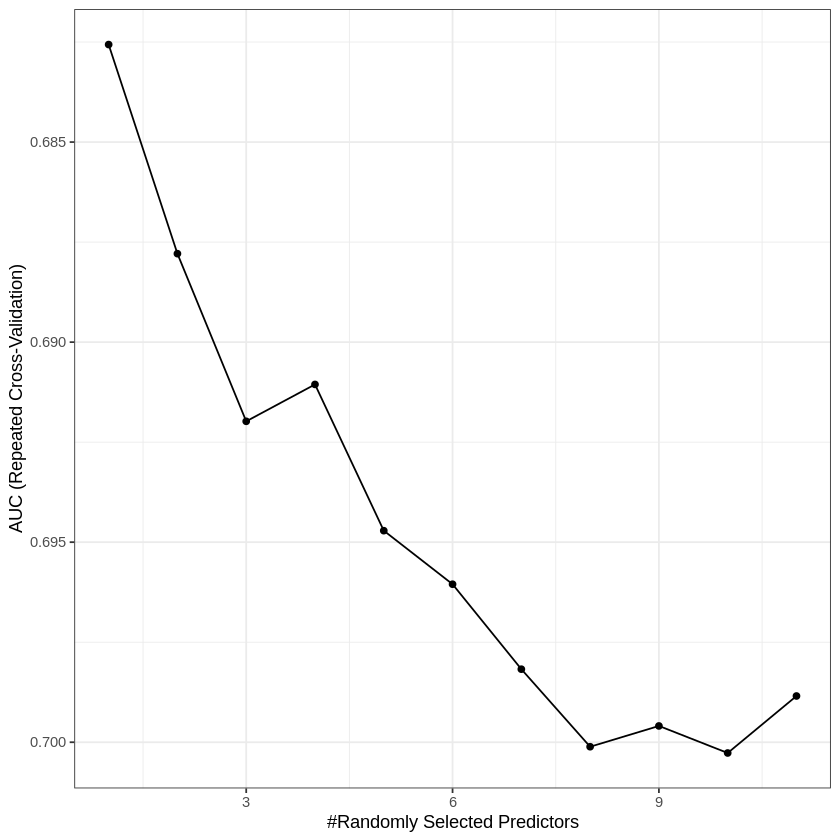


Train time =  11.6619849363963
Train Base best models
   mtry   logLoss       AUC     prAUC  Accuracy     Kappa        F1
10   10 0.4743348 0.7343442 0.6755919 0.7965970 0.2913115 0.8775232
9     9 0.4749186 0.7339868 0.6759509 0.7966605 0.2910161 0.8775873
7     7 0.4711466 0.7335236 0.6762344 0.7978193 0.2920866 0.8784449
11   11 0.4774186 0.7328773 0.6731695 0.7964701 0.2922569 0.8773720
5     5 0.4725776 0.7325783 0.6769106 0.7984382 0.2900200 0.8790396

Test Base results
      Predicted
Actual   No  Yes
   No  6640  369
   Yes 1407  583

True Positive (TP): 583 
True Negative (TN): 6640 
False Positive (FP): 369 
False Negative (FN): 1407 
Sensitivity (True Positive Rate): 0.2929648 
Specificity (True Negative Rate): 0.9473534 
Precision: 0.612395 
F1 Score: 0.396329 
Accuracy: 0.8026447 

Ntree =  150

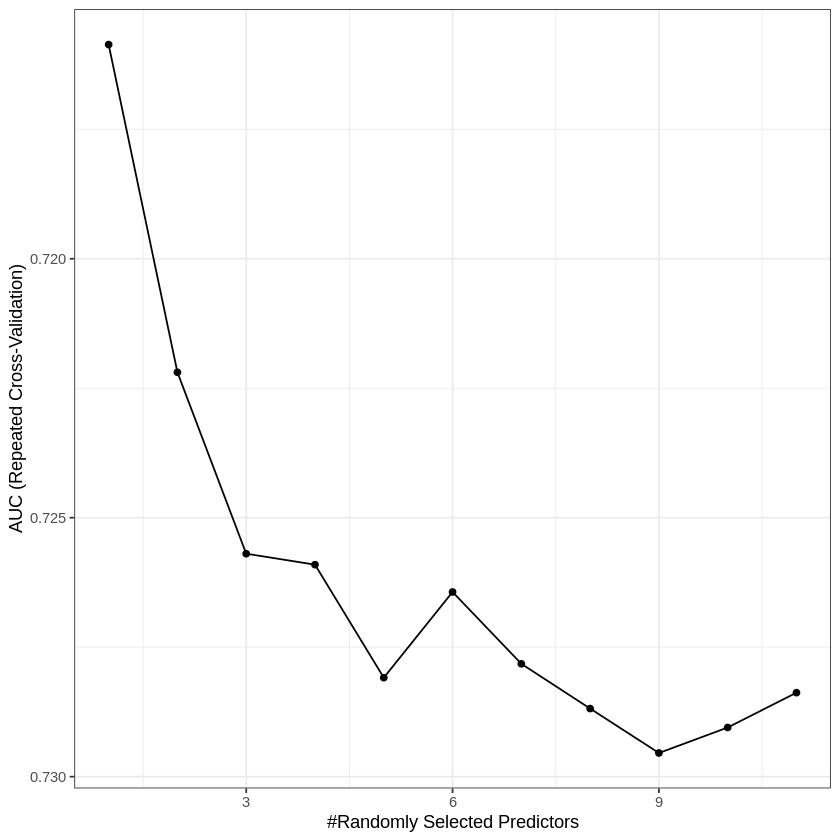


Train time =  17.9227536876996
Train Base best models
   mtry   logLoss       AUC     prAUC  Accuracy     Kappa        F1
10   10 0.4698715 0.7358224 0.6786106 0.7972161 0.2931037 0.8779158
9     9 0.4686771 0.7351192 0.6783903 0.7978350 0.2945916 0.8783235
7     7 0.4672527 0.7345997 0.6786332 0.7985177 0.2944332 0.8788695
11   11 0.4703957 0.7345135 0.6765954 0.7966764 0.2916083 0.8775696
5     5 0.4672941 0.7337305 0.6787234 0.7992001 0.2928879 0.8794852

Test Base results
      Predicted
Actual   No  Yes
   No  6644  365
   Yes 1404  586

True Positive (TP): 586 
True Negative (TN): 6644 
False Positive (FP): 365 
False Negative (FN): 1404 
Sensitivity (True Positive Rate): 0.2944724 
Specificity (True Negative Rate): 0.9479241 
Precision: 0.6161935 
F1 Score: 0.3985039 
Accuracy: 0.8034226 

Ntree =  200

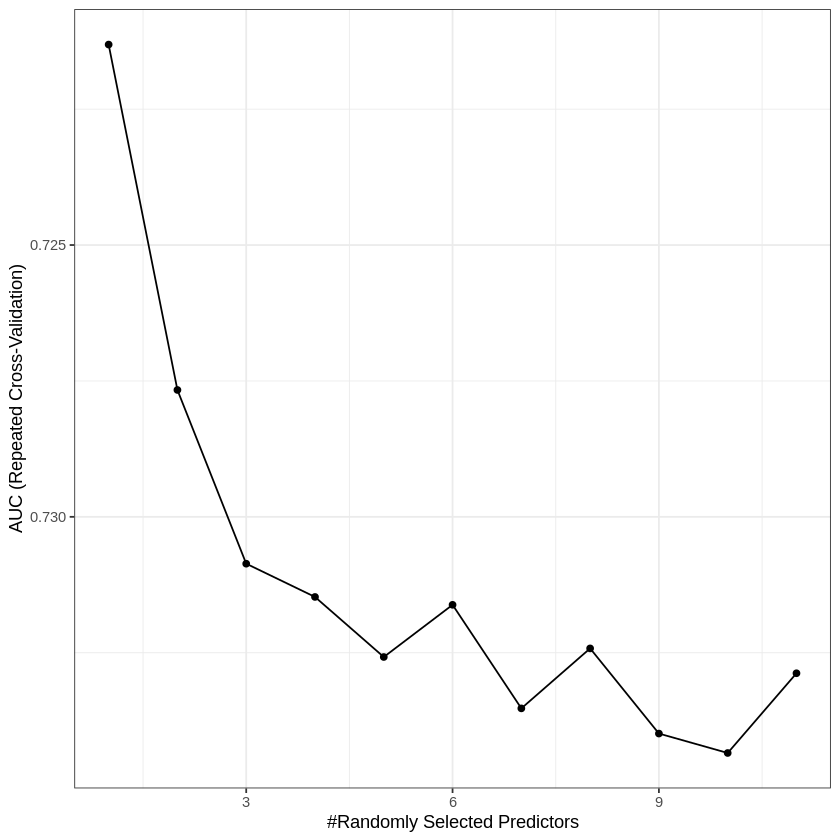


Train time =  23.5303393562635
Train Base best models
   mtry   logLoss       AUC     prAUC  Accuracy     Kappa        F1
10   10 0.4671667 0.7365145 0.6795582 0.7973431 0.2933637 0.8780024
9     9 0.4665016 0.7358879 0.6794317 0.7983271 0.2962820 0.8786207
7     7 0.4655941 0.7354403 0.6794879 0.7985335 0.2942528 0.8788914
11   11 0.4682743 0.7354289 0.6782989 0.7972637 0.2930062 0.8779577
5     5 0.4653516 0.7349474 0.6798248 0.7994540 0.2933780 0.8796590

Test Base results
      Predicted
Actual   No  Yes
   No  6654  355
   Yes 1407  583

True Positive (TP): 583 
True Negative (TN): 6654 
False Positive (FP): 355 
False Negative (FN): 1407 
Sensitivity (True Positive Rate): 0.2929648 
Specificity (True Negative Rate): 0.9493508 
Precision: 0.6215352 
F1 Score: 0.398224 
Accuracy: 0.8042005 

Ntree =  250

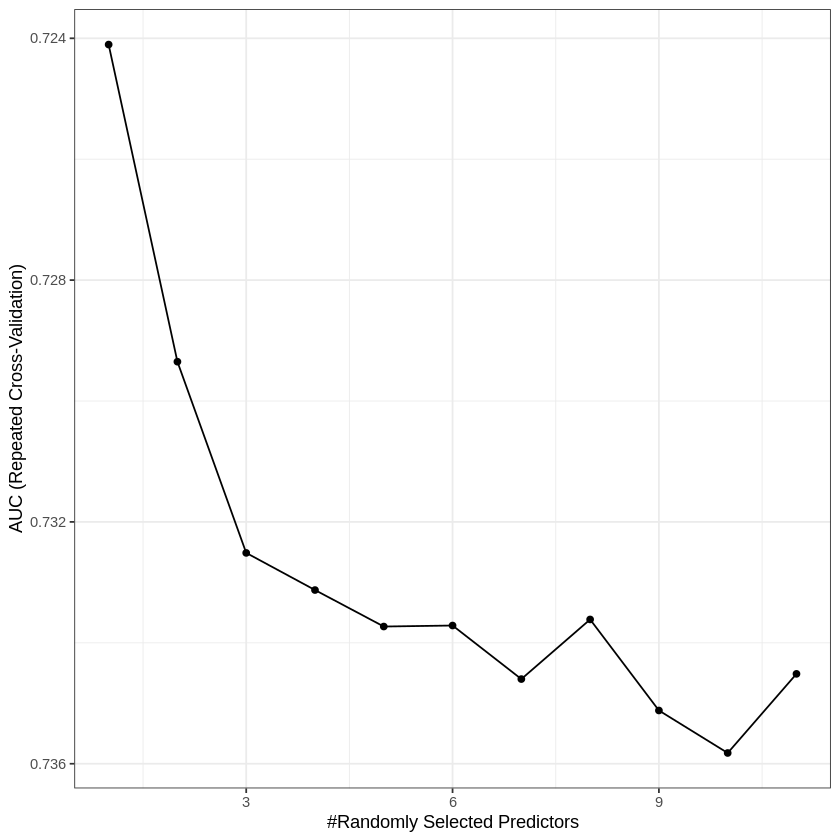


Train time =  30.2553273121516
Train Base best models
   mtry   logLoss       AUC     prAUC  Accuracy     Kappa        F1
10   10 0.4660381 0.7372394 0.6801519 0.7972638 0.2929788 0.8779602
9     9 0.4656300 0.7369067 0.6803813 0.7983588 0.2960399 0.8786596
7     7 0.4650070 0.7360197 0.6801137 0.7988509 0.2947088 0.8791163
11   11 0.4667753 0.7358573 0.6789060 0.7975493 0.2945239 0.8781021
6     6 0.4650786 0.7355563 0.6794492 0.7987716 0.2931313 0.8791379

Test Base results
      Predicted
Actual   No  Yes
   No  6653  356
   Yes 1400  590

True Positive (TP): 590 
True Negative (TN): 6653 
False Positive (FP): 356 
False Negative (FN): 1400 
Sensitivity (True Positive Rate): 0.2964824 
Specificity (True Negative Rate): 0.9492082 
Precision: 0.6236786 
F1 Score: 0.4019074 
Accuracy: 0.8048672 

Ntree =  300

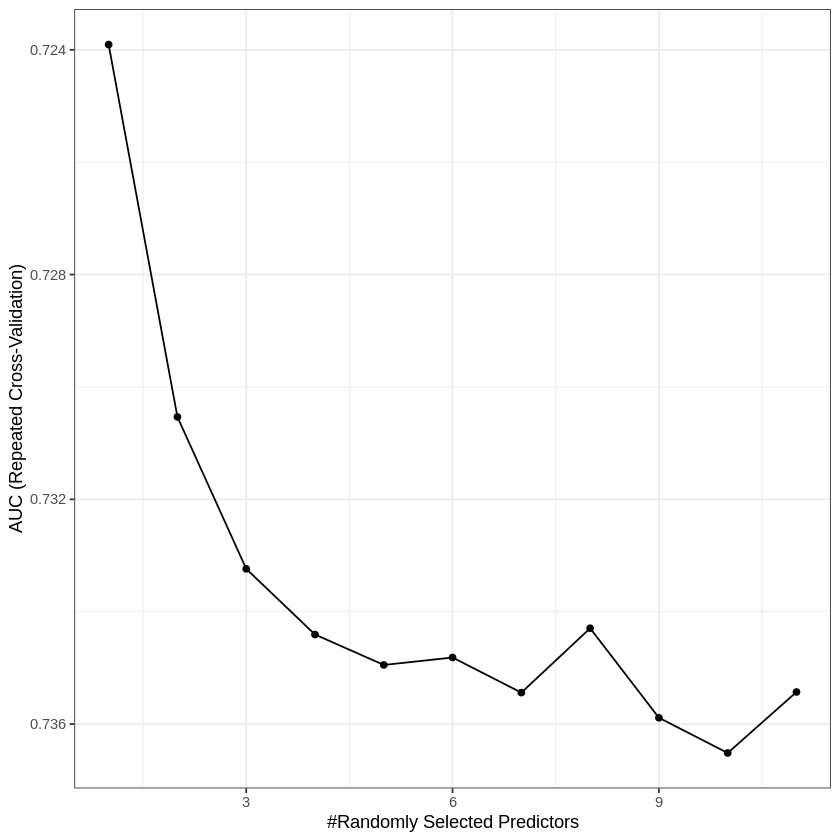


Train time =  36.3999844431877
Train Base best models
   mtry   logLoss       AUC     prAUC  Accuracy     Kappa        F1
10   10 0.4658975 0.7374267 0.6801986 0.7974859 0.2939202 0.8780847
9     9 0.4650246 0.7369900 0.6805834 0.7981048 0.2951427 0.8785071
6     6 0.4644856 0.7363657 0.6801964 0.7988351 0.2937427 0.8791561
11   11 0.4663524 0.7363345 0.6793791 0.7975493 0.2948726 0.8780834
7     7 0.4646871 0.7362645 0.6805123 0.7987240 0.2939089 0.8790593

Test Base results
      Predicted
Actual   No  Yes
   No  6664  345
   Yes 1404  586

True Positive (TP): 586 
True Negative (TN): 6664 
False Positive (FP): 345 
False Negative (FN): 1404 
Sensitivity (True Positive Rate): 0.2944724 
Specificity (True Negative Rate): 0.9507776 
Precision: 0.6294307 
F1 Score: 0.4012325 
Accuracy: 0.8056451 



=====> Training execution started: 3 
Train data set
 No / Yes 
16355 4646
Test data set
 No / Yes 
7009 1990

Ntree =  10

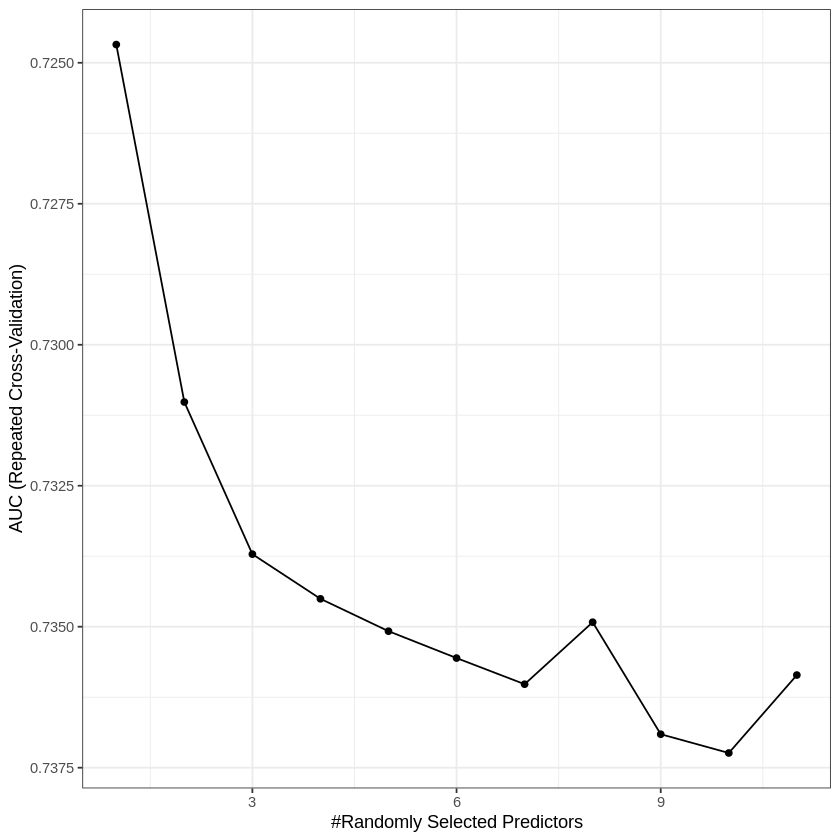


Train time =  1.63641536235809
Train Base best models
   mtry  logLoss       AUC     prAUC  Accuracy     Kappa        F1
7     7 1.248000 0.6999192 0.5370570 0.7837881 0.2567816 0.8692533
8     8 1.245791 0.6996509 0.5343082 0.7835500 0.2596702 0.8689060
11   11 1.236359 0.6987096 0.5292620 0.7808515 0.2542326 0.8670558
6     6 1.204365 0.6985938 0.5387270 0.7856134 0.2596258 0.8705522
5     5 1.222528 0.6973906 0.5393275 0.7853752 0.2599872 0.8703438

Test Base results
      Predicted
Actual   No  Yes
   No  6601  408
   Yes 1398  592

True Positive (TP): 592 
True Negative (TN): 6601 
False Positive (FP): 408 
False Negative (FN): 1398 
Sensitivity (True Positive Rate): 0.2974874 
Specificity (True Negative Rate): 0.9417891 
Precision: 0.592 
F1 Score: 0.3959866 
Accuracy: 0.799311 

Ntree =  50

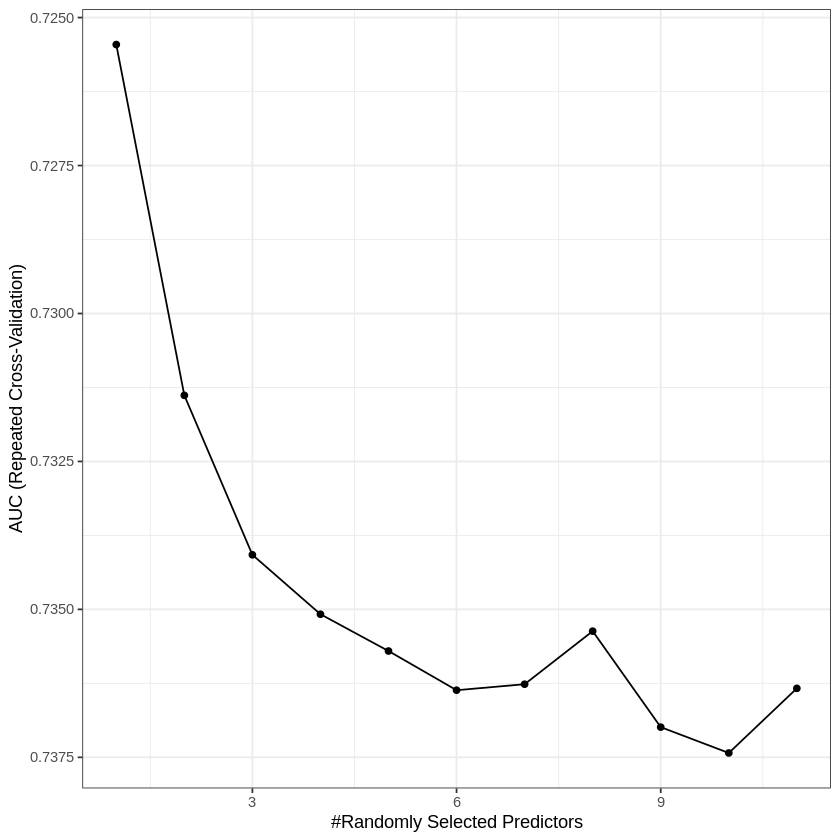


Train time =  6.13027263085047
Train Base best models
   mtry   logLoss       AUC     prAUC  Accuracy     Kappa        F1
7     7 0.5128323 0.7284080 0.6634182 0.7968033 0.2905060 0.8777249
11   11 0.5196562 0.7277983 0.6588145 0.7962319 0.2918746 0.8771998
6     6 0.5070765 0.7274582 0.6651051 0.7968669 0.2874083 0.8779412
8     8 0.5198948 0.7272662 0.6617885 0.7958034 0.2880725 0.8770660
5     5 0.5087185 0.7268006 0.6639060 0.7967399 0.2851749 0.8779577

Test Base results
      Predicted
Actual   No  Yes
   No  6648  361
   Yes 1412  578

True Positive (TP): 578 
True Negative (TN): 6648 
False Positive (FP): 361 
False Negative (FN): 1412 
Sensitivity (True Positive Rate): 0.2904523 
Specificity (True Negative Rate): 0.9484948 
Precision: 0.6155485 
F1 Score: 0.394674 
Accuracy: 0.8029781 

Ntree =  100

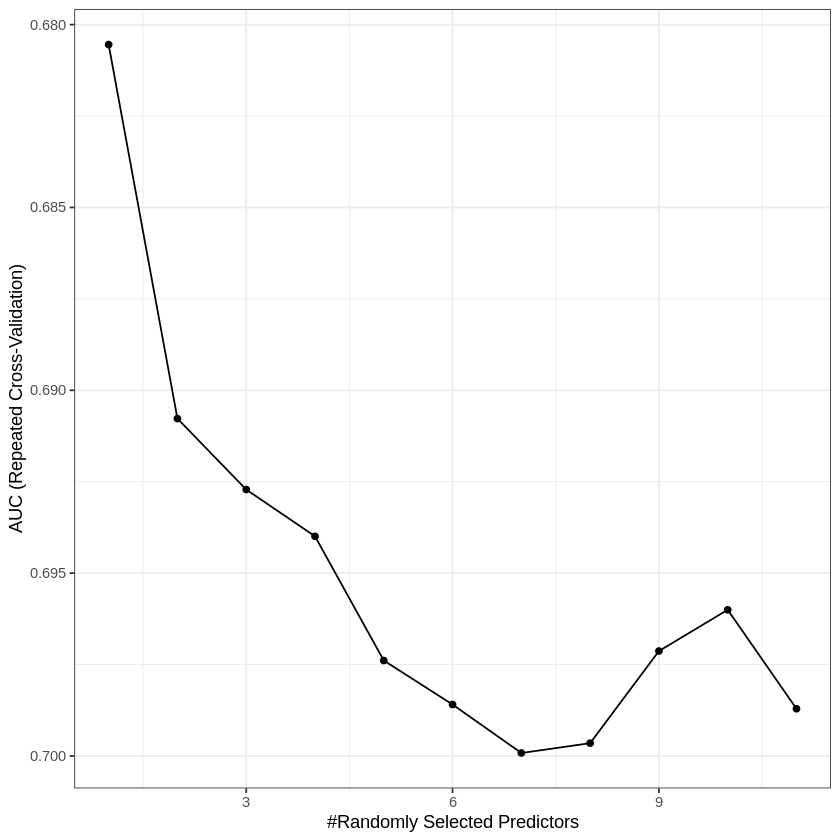


Train time =  12.3496253967285
Train Base best models
   mtry   logLoss       AUC     prAUC  Accuracy     Kappa        F1
7     7 0.4758585 0.7328499 0.6756314 0.7978985 0.2935537 0.8784240
4     4 0.4697010 0.7326443 0.6768237 0.7983588 0.2883675 0.8790572
11   11 0.4805860 0.7321255 0.6732024 0.7970890 0.2927732 0.8778288
8     8 0.4785699 0.7320688 0.6750516 0.7979145 0.2944378 0.8783912
10   10 0.4773592 0.7319304 0.6737594 0.7965970 0.2910105 0.8775365

Test Base results
      Predicted
Actual   No  Yes
   No  6665  344
   Yes 1406  584

True Positive (TP): 584 
True Negative (TN): 6665 
False Positive (FP): 344 
False Negative (FN): 1406 
Sensitivity (True Positive Rate): 0.2934673 
Specificity (True Negative Rate): 0.9509202 
Precision: 0.6293103 
F1 Score: 0.4002742 
Accuracy: 0.8055339 

Ntree =  150

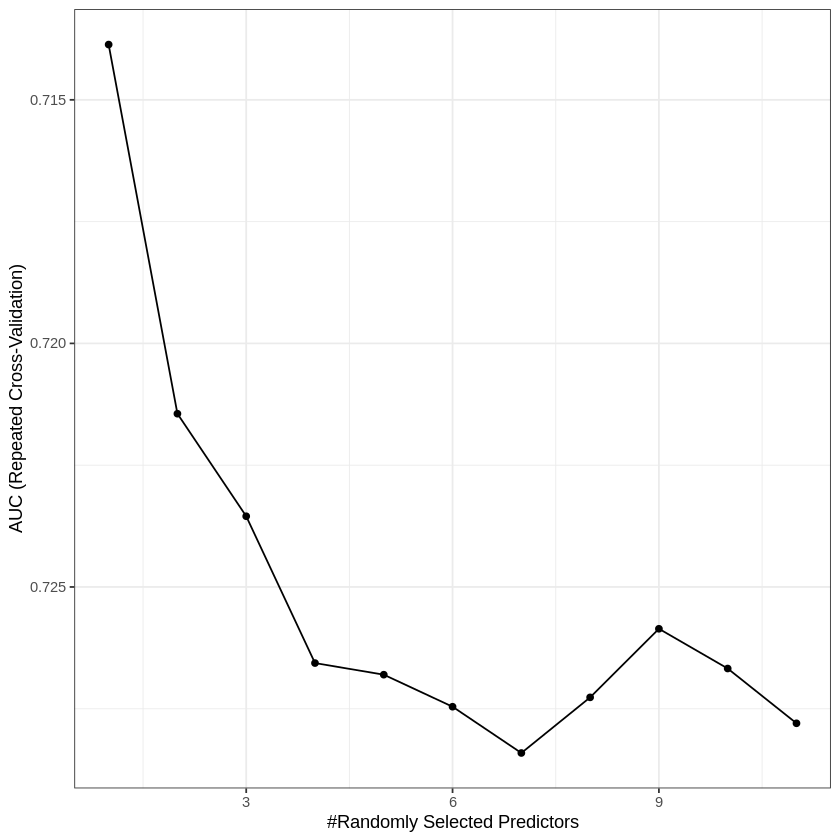


Train time =  18.4934345444043
Train Base best models
   mtry   logLoss       AUC     prAUC  Accuracy     Kappa        F1
10   10 0.4700063 0.7338234 0.6774087 0.7980255 0.2961421 0.8783875
7     7 0.4686832 0.7337322 0.6786432 0.7979938 0.2942012 0.8784643
8     8 0.4704931 0.7335408 0.6782107 0.7987080 0.2962204 0.8789196
6     6 0.4678241 0.7335392 0.6790719 0.7985017 0.2927043 0.8789445
4     4 0.4653304 0.7334545 0.6790066 0.7994540 0.2925772 0.8796964

Test Base results
      Predicted
Actual   No  Yes
   No  6648  361
   Yes 1410  580

True Positive (TP): 580 
True Negative (TN): 6648 
False Positive (FP): 361 
False Negative (FN): 1410 
Sensitivity (True Positive Rate): 0.2914573 
Specificity (True Negative Rate): 0.9484948 
Precision: 0.6163656 
F1 Score: 0.3957694 
Accuracy: 0.8032004 

Ntree =  200

In [ ]:
times_execution_all = 3
best_cv_num = 5
folds_repeat = 3

metric='AUC'
tree_hyperparams = c(10, 50, 100, 150, 200, 250, 300)

var_seed = 42 # Set a random seed for reproducibility, changed each time it executes all
# saves the best results
rf_best_tune_grid.mtry <- 0
rf_best_tune_grid.ntree <- 0
rf_best_tune_grid.precision <- 0
rf_best_tune_grid.F1_score <- 0
rf_best_tune_grid.accuracy <- 0
rf_best_tune_grid.metric_used <- 0

for (t in seq_len(times_execution_all)) {

  cat(paste("\n\n\n=====> Training execution started:", t, "\n"))
  var_seed = var_seed*2
  set.seed(var_seed)
  tt <- get_train_test_sets(data_pca)
  training_data <- tt$train_data
  testing_data <- tt$test_data

  set.seed(var_seed)
  control_improved <- caret::trainControl(
      method = "repeatedcv",            # Cross-validation method (e.g., repeated k-fold)
      number = best_cv_num,             # Number of folds
      repeats = folds_repeat,                      # Number of repetitions for repeated k-fold

      summaryFunction = multiClassSummary,  # Evaluation metric (AUC, sensitivity, specificity)
      classProbs = TRUE, # needed to calc metrics
      savePredictions = TRUE  # Save predictions for analysis
  )


  # tune grid using 1 to max components
  tune_grid <- expand.grid(
    mtry = c(1:pca_num_components)
  )

  modellist <- list()
  rf_best_tune_grid.metric <- 0
  for (ntree in tree_hyperparams ){
      cat(paste("\nNtree = ", ntree))

      tempo_ini <- Sys.time()
      set.seed(var_seed)
      rf_base <- train(
                defvar ~ .,
                data = training_data[,c(colnames(training_data))],
                method = "rf",
                metric = metric,
                trControl = control_improved,
                tuneGrid = tune_grid,
                ntree = ntree
      )
      tempo_fim <- Sys.time()
      cat(paste("\nTrain time = ", tempo_fim - tempo_ini))

      key <- toString(ntree)
      modellist[[key]] <- rf_base

      class_train <- predict(rf_base, training_data)
      class_test  <- predict(rf_base, testing_data)

      cat("\nTrain Base best models\n=============\n")
      tmp <- rf_base$results[order(rf_base$results[,metric],decreasing=TRUE),] %>% head(5)
      print(tmp[1:7])
      print(tune_plot(rf_base, metric))

      actual <- testing_data$defvar
      predicted <- class_test
      confusion_matrix <- table(Actual = actual, Predicted = predicted)
      # Calculate True Positive (TP), True Negative (TN), False Positive (FP), False Negative (FN)
      TP <- confusion_matrix[2, 2]  # Actual 1, Predicted 1
      TN <- confusion_matrix[1, 1]  # Actual 0, Predicted 0
      FP <- confusion_matrix[1, 2]  # Actual 0, Predicted 1
      FN <- confusion_matrix[2, 1]  # Actual 1, Predicted 0
      # Calculate Sensitivity (True Positive Rate)
      sensitivity <- TP / (TP + FN)
      # Calculate Specificity (True Negative Rate)
      specificity <- TN / (TN + FP)
      # Calculate Precision
      precision <- TP / (TP + FP)
      # Calculate F1 Score
      F1_score <- 2 * (precision * sensitivity) / (precision + sensitivity)
      # Calculate Accuracy
      accuracy <- (TP + TN) / sum(confusion_matrix)
      metric_used = precision

      # Print the results
      cat("\nTest Base results\n=============\n")
      print(confusion_matrix)
      cat("\nTrue Positive (TP):", TP, "\n")
      cat("True Negative (TN):", TN, "\n")
      cat("False Positive (FP):", FP, "\n")
      cat("False Negative (FN):", FN, "\n")
      cat("Sensitivity (True Positive Rate):", sensitivity, "\n")
      cat("Specificity (True Negative Rate):", specificity, "\n")
      cat("Precision:", precision, "\n")
      cat("F1 Score:", F1_score, "\n")
      cat("Accuracy:", accuracy, "\n")

      if(metric_used > rf_best_tune_grid.metric_used) {
          rf_best_tune_grid.mtry = rf_base$bestTune$mtry
          rf_best_tune_grid.ntree = ntree
          rf_best_tune_grid.precision = precision
          rf_best_tune_grid.F1_score = F1_score
          rf_best_tune_grid.accuracy = accuracy
          rf_best_tune_grid.sensitivity = sensitivity
          rf_best_tune_grid.specificity = specificity
      }

  }
}

## 5) Avaliação na base de testes


Seleção dos melhores modelos de cada arquitetura


In [3]:
cat("\
# Calculate Sensitivity (True Positive Rate)\
sensitivity <- TP / (TP + FN)\n\
# Calculate Specificity (True Negative Rate)\
specificity <- TN / (TN + FP)\n\
# Calculate Precision\
precision <- TP / (TP + FP)\n\
# Calculate F1 Score\
F1_score <- 2 * (precision * sensitivity) / (precision + sensitivity)\n\
# Calculate Accuracy\
accuracy <- (TP + TN) / sum(confusion_matrix)\n\
")
modellist
# Compare results
results <- resamples(modellist)
summary(results)

paste("Best ntree: ", rf_best_tune_grid.ntree)
paste("Best mtry : ", rf_best_tune_grid.mtry)

paste("Best Specificity  : ", rf_best_tune_grid.specificity)
paste("Best Sensitivity  : ", rf_best_tune_grid.sensitivity)
paste("Best precision : ", rf_best_tune_grid.precision)
paste("Best Accuracy  : ", rf_best_tune_grid.accuracy)
paste("Best F1        : ", rf_best_tune_grid.F1_score)




# Calculate Sensitivity (True Positive Rate)
sensitivity <- TP / (TP + FN)

# Calculate Specificity (True Negative Rate)
specificity <- TN / (TN + FP)

# Calculate Precision
precision <- TP / (TP + FP)

# Calculate F1 Score
F1_score <- 2 * (precision * sensitivity) / (precision + sensitivity)

# Calculate Accuracy
accuracy <- (TP + TN) / sum(confusion_matrix)



ERROR: ignored

# Resultados

# Conclusão

O trabalho utilizou a técnica RandomForest, que foi a mais acurada técnica encontrada nos trabalhos pesquisados. De modo geral, RandomForest tem a maior precisão em modelos não balanceados e é executada rapidamente.

A inovação deste trabalho, dentro da simples pesquisa de outros trabalhos realizada, foi a utilização do PCA para a escolha das melhores features.

Os resultados mostraram que o uso do PCA ...

Em futuros trabalhos, pretende-se variar mais parâmetros da RandomForest, eu utilizar outras métricas no treinamento. Também, balancear as bases em razão da quantidade de default e não default, o que revelou ser uma das principais técnicas usadas nos trabalhos pesquisados que aumentou consideravelmente a acurácia sobre a predição de inadimplentes.


# REFERÊNCIAS


[1] - https://ieeexplore.ieee.org/abstract/document/9275986?casa_token=CQKs1zfn9ZIAAAAA:Y6-Iu4U6b8DClAZVmgN8x-HdwQP2u2TAWwI2N_BU3JAVvqtuGfPAe1-DqUDiX4OWP66VTnFHMaM

[2] - https://ieeexplore.ieee.org/abstract/document/8776802?casa_token=VXxrW6tZNV8AAAAA:IuUNnSGEFwJIJ98iMFm7fQ8ulI79EbkukcZh3AX7yjw9tlavxRZQQ-MRUmq_hJXj39Wgl8zJBZM

[3] - https://www.ijcaonline.org/archives/volume145/number7/ajay-2016-ijca-910702.pdf


